In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## !conda install -c anaconda nltk -y
import nltk


import warnings
warnings.filterwarnings('ignore')
## nltk.download('punkt_tab')
## nltk.download('stopwords')

In [2]:
dt = pd.read_csv("C:/Users/rsing/Downloads/Amazon_Review_csv.csv")
dt.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df= dt.head(2500)

In [4]:
df.shape

(2500, 10)

In [5]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df.shape

(2500, 10)

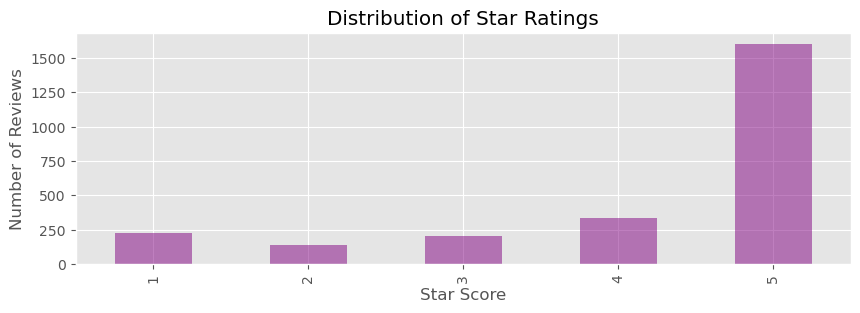

In [7]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind='bar', figsize=(10,3), color = 'purple', alpha=0.5)
ax.set_xlabel('Star Score')
ax.set_ylabel('Number of Reviews')
ax.set_title('Distribution of Star Ratings')
plt.show()

In [8]:
## Basic Nltk
ex = df['Text'][10]
ex

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [9]:
import nltk
from nltk.tokenize import word_tokenize

nltk.word_tokenize(ex)

['I',
 'do',
 "n't",
 'know',
 'if',
 'it',
 "'s",
 'the',
 'cactus',
 'or',
 'the',
 'tequila',
 'or',
 'just',
 'the',
 'unique',
 'combination',
 'of',
 'ingredients',
 ',',
 'but',
 'the',
 'flavour',
 'of',
 'this',
 'hot',
 'sauce',
 'makes',
 'it',
 'one',
 'of',
 'a',
 'kind',
 '!',
 'We',
 'picked',
 'up',
 'a',
 'bottle',
 'once',
 'on',
 'a',
 'trip',
 'we',
 'were',
 'on',
 'and',
 'brought',
 'it',
 'back',
 'home',
 'with',
 'us',
 'and',
 'were',
 'totally',
 'blown',
 'away',
 '!',
 'When',
 'we',
 'realized',
 'that',
 'we',
 'simply',
 'could',
 "n't",
 'find',
 'it',
 'anywhere',
 'in',
 'our',
 'city',
 'we',
 'were',
 'bummed.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'Now',
 ',',
 'because',
 'of',
 'the',
 'magic',
 'of',
 'the',
 'internet',
 ',',
 'we',
 'have',
 'a',
 'case',
 'of',
 'the',
 'sauce',
 'and',
 'are',
 'ecstatic',
 'because',
 'of',
 'it.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'If',
 'you',
 'love',
 'hot',
 'sauce',
 '.

In [10]:
token = nltk.word_tokenize(ex)
token[:10]

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or']

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rsing\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [12]:
tagged = nltk.pos_tag(token)
tag = tagged[:10]
tag

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [13]:
# import nltk
# nltk.download('all')

In [14]:
entity = nltk.chunk.ne_chunk(tag)
entity.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC)


In [15]:
# Vadar (Valence Aware dictionary and sentiment reasoner) - bag of word approch
# we will use NLTK sentimentintensityanalyzer to get the neg/neu/pos score of the text
# 1) stop word are removed
# 2) each word is scord and combined to a total score

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [18]:
sia.polarity_scores('I feel bad today')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [19]:
sia.polarity_scores('My manager told me you are good person')

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

In [20]:
ex

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [21]:
sia.polarity_scores(ex)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [22]:
## run the polarity score on the entire dataset
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [24]:
vader=pd.DataFrame(res).T
vaders = vader.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, on='Id', how='left')

In [25]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


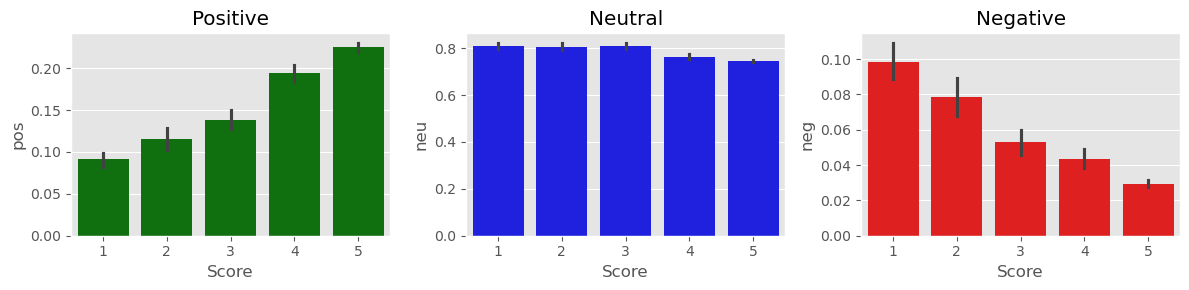

In [26]:
fig, axs=plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], color = 'Green')
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], color = 'Blue')
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], color = 'Red')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [27]:
## step 3 = Roberta Pretrained Model
# Use model trained of a large corpus of data
# Transformer model accounts for the word but also the context related to the other words

In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
#!pip install torch

Model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
## Vadar Example
print(ex)
sia.polarity_scores(ex)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [31]:
encoded_txt = tokenizer(ex, return_tensors='pt')
output=model(**encoded_txt)
score=output[0][0].detach().numpy()
score=softmax(score)
score_dict = {
    'roberta_neg':score[0],
    'roberta_neu':score[1],
    'roberta_pos':score[2]
}
print(score_dict)

{'roberta_neg': 0.01753518, 'roberta_neu': 0.061356384, 'roberta_pos': 0.9211084}


In [32]:
def polarity_scores_roberta(ex):
    encoded_txt = tokenizer(ex, return_tensors='pt')
    output=model(**encoded_txt)
    score=output[0][0].detach().numpy()
    score=softmax(score)
    score_dict = {
        'roberta_neg':score[0],
        'roberta_neu':score[1],
        'roberta_pos':score[2]
    }
    return score_dict

In [33]:
import torch
from scipy.special import softmax

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

def polarity_scores_roberta(ex):
    encoded_txt = tokenizer(
        ex,
        return_tensors='pt',
        truncation=True,
        max_length=512,
        padding=True
    )
    encoded_txt = {k: v.to(device) for k, v in encoded_txt.items()}  # Move input to device

    output = model(**encoded_txt)
    score = output.logits[0].detach().cpu().numpy()
    score = softmax(score)

    return {
        'roberta_neg': score[0],
        'roberta_neu': score[1],
        'roberta_pos': score[2]
    }


In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vedar_result = sia.polarity_scores(text)
    vedar_result_rename= {}
    for key, value in vedar_result.items():
        vedar_result_rename[f"vader_{key}"]=value
    roberta_result = polarity_scores_roberta(text)
    both={**vedar_result_rename, **roberta_result}
    res[myid] = both

  0%|          | 0/2500 [00:00<?, ?it/s]

In [ ]:
result_df=pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.merge(df, on='Id', how='left')

In [ ]:
result_df.head(3)

In [ ]:
result_df.query('Score == 1')\
.sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline('sentiment-analysis', framework='pt')

In [ ]:
sent_pipeline('I love to eat food')

In [ ]:
sent_pipeline('Boooo')

In [ ]:
sent_pipeline('These condiments are overpriced and terrible.The classic is disgustingly sweet. The spiced tastes like a bad spicy marinara sauce from a chain restaurant.')

In [ ]:
from transformers import pipeline


sent_pipeline = pipeline(
    "sentiment-analysis", 
    model="distilbert-base-uncased-finetuned-sst-2-english", 
    framework="pt"
)

# Save model and tokenizer
sent_pipeline.model.save_pretrained("./sentiment_model")
sent_pipeline.tokenizer.save_pretrained("./sentiment_model")